# Self-Organizing Map (SOM)


## Problem Statement


Implement **Self-Organizing Map (SOM)** on **Iris dataset**.


### Import Libraries


In [1]:
import os
import shutil
import pandas as pd
from minisom import MiniSom
import imageio.v2 as imageio
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler

### Load Dataset


In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
species_map = {i: name for i, name in enumerate(iris.target_names)}
df["species"] = [species_map[label] for label in iris.target]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Scale the features


In [3]:
scaler = MinMaxScaler()
X = iris.data[:, [0, 3]]
labels = iris.target
X_scaled = scaler.fit_transform(X)

### Creating SOM


In [4]:
som_size = (10, 10)
som = MiniSom(
    som_size[0],
    som_size[1],
    X_scaled.shape[1],
    sigma=0.5,
    learning_rate=0.5,
    random_seed=42,
)
som.random_weights_init(X_scaled)

### Visualize SOM


In [5]:
# plt.pcolor(som.distance_map().T, cmap="bone_r")
# plt.colorbar(label="Distance")

# markers = ["o", "s", "D"]
# colors = ["r", "g", "b"]

# for i, x in enumerate(X_scaled):
#     w = som.winner(x)
#     plt.plot(
#         w[0] + 0.5,
#         w[1] + 0.5,
#         markers[labels[i]],
#         markerfacecolor="None",
#         markeredgecolor=colors[labels[i]],
#         markersize=10,
#         markeredgewidth=2,
#     )

# plt.title("SOM on Iris Dataset (Sepal Length & Petal Width)")
# plt.show()

In [6]:
frames = []
os.makedirs("images", exist_ok=True)

print("Creating GIF...")

for i in range(1, 201):
    som.train_random(X_scaled, 1)

    plt.figure(figsize=(6, 6))
    plt.pcolor(som.distance_map().T, cmap="bone_r")
    plt.title(f"SOM after {i} iterations")
    plt.colorbar(label="Distance")
    plt.scatter(
        X_scaled[:, 0] * som_size[0],
        X_scaled[:, 1] * som_size[1],
        c="r",
        s=10,
        alpha=0.6,
        label="Data Points",
    )
    plt.legend()
    filename = f"images/frame_{i:03d}.png"
    plt.savefig(filename)
    plt.close()
    frames.append(filename)

gif_filename = "som.gif"
with imageio.get_writer(gif_filename, mode="I", duration=0.3) as writer:
    for frame in frames:
        image = imageio.imread(frame)
        writer.append_data(image)

print(f"GIF saved as '{gif_filename}'")

Creating GIF...
GIF saved as 'som.gif'


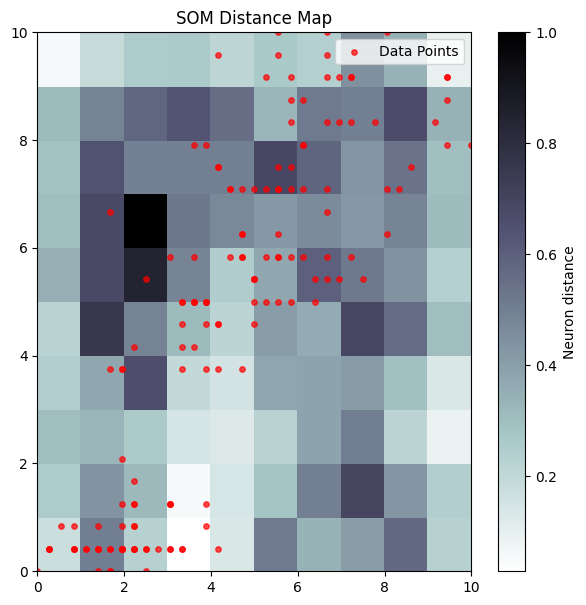

In [7]:
plt.figure(figsize=(7, 7))
plt.pcolor(som.distance_map().T, cmap="bone_r")
plt.title("SOM Distance Map")
plt.colorbar(label="Neuron distance")
plt.scatter(
    X_scaled[:, 0] * som_size[0],
    X_scaled[:, 1] * som_size[1],
    c="red",
    s=15,
    alpha=0.7,
    label="Data Points",
)
plt.legend()
plt.show()

In [8]:
frames_dir = "images"

if os.path.exists(frames_dir):
    shutil.rmtree(frames_dir)
else:
    pass

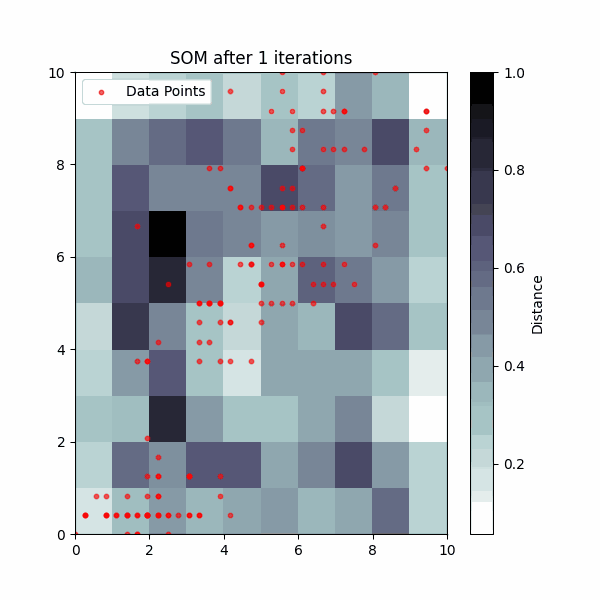

In [9]:
Image(filename="som.gif", width="700px", alt="SOM Approximation GIF")